# format like cleanlab tutorial

In [1]:
import pickle

from cleanlab.object_detection.rank import get_label_quality_scores, issues_from_scores, visualize

# 1. Load the annotations and predictions (this would be provided by the user)
- discuss format

In [2]:
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial/results.pkl'
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial/dataset.pkl'
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial/example_images.zip' && unzip -q -o example_images.zip

File ‘results.pkl’ already there; not retrieving.

File ‘dataset.pkl’ already there; not retrieving.

File ‘example_images.zip’ already there; not retrieving.



In [3]:
predictions = pickle.load(open("results.pkl", "rb"))
annotations = pickle.load(open("dataset.pkl", "rb"))

Annotations contains a list of dictionaries where each annotation is a dictionary that has to contian at least `bboxes` and `labels` dictionary entries. Our annotations is created from mmdet model and therefore comes with extra keys.

`bboxes[j]` is in the format `[x,y,w,h]` with given label `labels[j]`

In [4]:
len(annotations), len(annotations[0])

(20, 5)

In [5]:
annotations[0]

{'bboxes': array([[388.66,  69.92, 498.07, 347.54],
        [  0.  , 262.81,  62.16, 299.58],
        [119.4 , 272.51, 144.22, 306.76],
        [141.47, 267.91, 173.66, 303.77]], dtype=float32),
 'labels': array([3, 3, 2, 2]),
 'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
 'masks': [[[446.71,
    70.66,
    466.07,
    72.89,
    471.28,
    78.85,
    473.51,
    88.52,
    473.51,
    98.2,
    462.34,
    111.6,
    475.74,
    126.48,
    484.67,
    136.16,
    494.35,
    157.74,
    496.58,
    174.12,
    498.07,
    182.31,
    485.42,
    189.75,
    474.25,
    189.01,
    470.53,
    202.4,
    475.74,
    337.12,
    469.04,
    347.54,
    455.65,
    343.08,
    450.44,
    323.72,
    441.5,
    255.99,
    433.32,
    250.04,
    406.52,
    340.1,
    397.59,
    344.56,
    388.66,
    330.42,
    408.01,
    182.31,
    396.85,
    186.77,
    392.38,
    177.84,
    389.4,
    166.68,
    390.89,
    147.32,
    418.43,
    119.04,
    434.06,
    111.6

Predictions is a list of `np.ndarray` list containing `np.ndarrays` where such that `predictions[i]` corresponds to the model prediction for the `i`-th image in the format `np.ndarray((K,))` where K is the number of classes and `results[i][k]` is of shape `np.ndarray(N,5)` where `N` is the number of bounding boxes for class `K` and the five columns correspond to `[x,y,w,h,pred_prob]` returned by the model.

Example uses `K == 5` classes which is why `predictions[0].shape = (5,)`. Once again this is a standard format returned by mmdet.

In [6]:
len(predictions), predictions[0].shape, predictions[0][0].shape, predictions[0][1].shape

(20, (5,), (0, 5), (7, 5))

In [7]:
predictions[0]

array([array([], shape=(0, 5), dtype=float32),
       array([[1.3501118e+02, 2.3542772e+02, 2.4279428e+02, 2.8032367e+02,
               4.4206613e-01],
              [2.7716379e+02, 3.7020465e+02, 3.3300687e+02, 4.2634985e+02,
               2.1322379e-01],
              [6.1857153e+02, 3.4551877e+02, 6.3922351e+02, 4.2645062e+02,
               1.0588003e-01],
              [1.3602586e+02, 2.4919717e+02, 1.5212564e+02, 2.7401797e+02,
               9.5685385e-02],
              [1.3501132e+02, 2.4770198e+02, 1.9328621e+02, 2.7312320e+02,
               8.6356521e-02],
              [1.3658011e+02, 2.4842778e+02, 1.6557944e+02, 2.7311761e+02,
               7.4790925e-02],
              [2.4792007e+02, 3.4129889e+02, 3.0850513e+02, 4.2598230e+02,
               5.3762816e-02]], dtype=float32)                            ,
       array([[1.57144455e+02, 1.13919823e+02, 1.73256195e+02, 1.29331223e+02,
               7.41836667e-01],
              [1.44432785e+02, 2.69502716e+02, 1.729748

# 2. Get label quality scores

**get_label_quality_scores()**

In [8]:
scores = get_label_quality_scores(annotations, predictions, method='subtype')
scores

array([0.60872398, 0.41890722, 0.78927665, 0.97704274, 0.81666554,
       0.90345619, 0.77330584, 0.96261323, 0.87820417, 0.89163454,
       0.96064026, 0.258118  , 0.94897368, 0.84867702, 0.93019314,
       0.94477917, 0.71949841, 0.93588254, 0.98000837, 0.41890722])

In [9]:
annotations[0]

{'bboxes': array([[388.66,  69.92, 498.07, 347.54],
        [  0.  , 262.81,  62.16, 299.58],
        [119.4 , 272.51, 144.22, 306.76],
        [141.47, 267.91, 173.66, 303.77]], dtype=float32),
 'labels': array([3, 3, 2, 2]),
 'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
 'masks': [[[446.71,
    70.66,
    466.07,
    72.89,
    471.28,
    78.85,
    473.51,
    88.52,
    473.51,
    98.2,
    462.34,
    111.6,
    475.74,
    126.48,
    484.67,
    136.16,
    494.35,
    157.74,
    496.58,
    174.12,
    498.07,
    182.31,
    485.42,
    189.75,
    474.25,
    189.01,
    470.53,
    202.4,
    475.74,
    337.12,
    469.04,
    347.54,
    455.65,
    343.08,
    450.44,
    323.72,
    441.5,
    255.99,
    433.32,
    250.04,
    406.52,
    340.1,
    397.59,
    344.56,
    388.66,
    330.42,
    408.01,
    182.31,
    396.85,
    186.77,
    392.38,
    177.84,
    389.4,
    166.68,
    390.89,
    147.32,
    418.43,
    119.04,
    434.06,
    111.6

**issues_from_scores()** returns an array of issue indices sorted from most to least severe who's label quality scores fall below the threshold if one is provided.

In [10]:
issue_idx = issues_from_scores(scores, threshold=1.0)
issue_idx

array([11, 19,  1,  0, 16,  6,  2,  4, 13,  8,  9,  5, 14, 17, 15, 12, 10,
        7,  3, 18])

In [11]:
scores[issue_idx]

array([0.258118  , 0.41890722, 0.41890722, 0.60872398, 0.71949841,
       0.77330584, 0.78927665, 0.81666554, 0.84867702, 0.87820417,
       0.89163454, 0.90345619, 0.93019314, 0.93588254, 0.94477917,
       0.94897368, 0.96064026, 0.96261323, 0.97704274, 0.98000837])

In [12]:
issue_idx_threshold = issues_from_scores(scores, threshold=0.5)
scores[issue_idx_threshold]

array([0.258118  , 0.41890722, 0.41890722])

# 3. Visualize Dataset

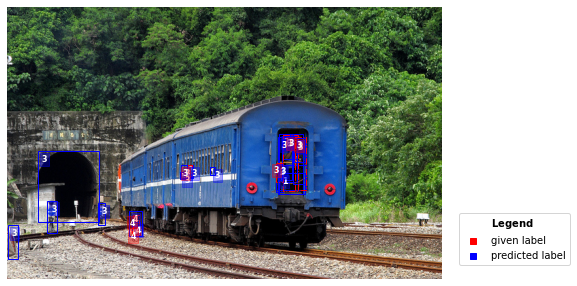

In [38]:
example_image_idx = 11
image_path = 'example_images/' + annotations[example_image_idx]['seg_map']

visualize(image_path, annotations[example_image_idx], predictions[example_image_idx])

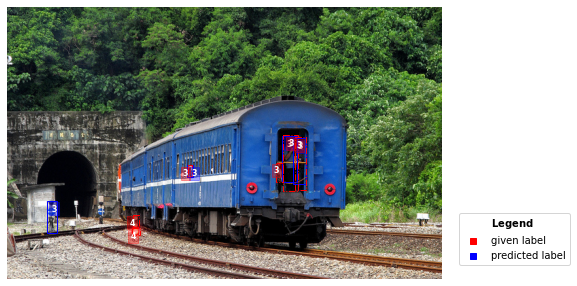

In [39]:
# use prediction_threshold to only show bounding boxes above threshold
visualize(image_path, annotations[example_image_idx], predictions[example_image_idx], prediction_threshold=0.7)

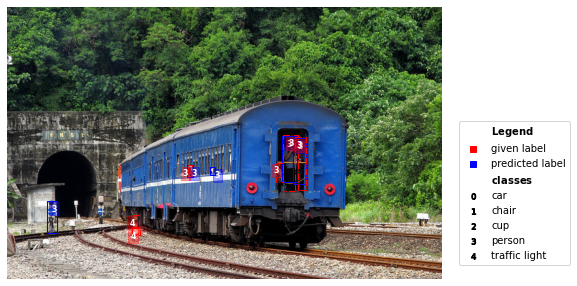

In [40]:
# pass in a class_labels dictionary to see labels in the legend
class_labels = {"0": "car", "1": "chair", "2": "cup", "3":"person", "4": "traffic light"}
visualize(image_path, annotations[example_image_idx], predictions[example_image_idx], prediction_threshold=0.5, class_labels=class_labels)

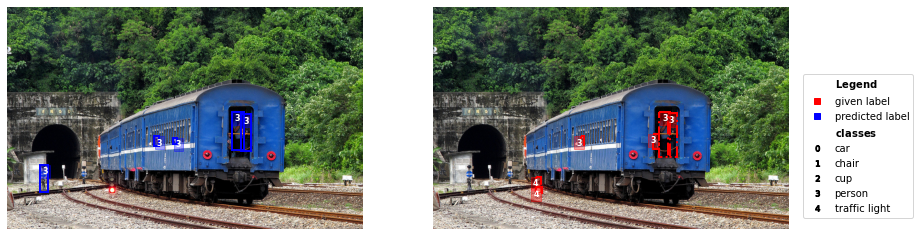

In [41]:
# split image into two seperate given label and prediction annotated images
class_labels = {0: "car", 1: "chair", 2: "cup", 3:"person", 4: "traffic light"}
visualize(image_path, annotations[example_image_idx], predictions[example_image_idx], given_label_overlay=False, prediction_threshold=0.5, class_labels=class_labels)

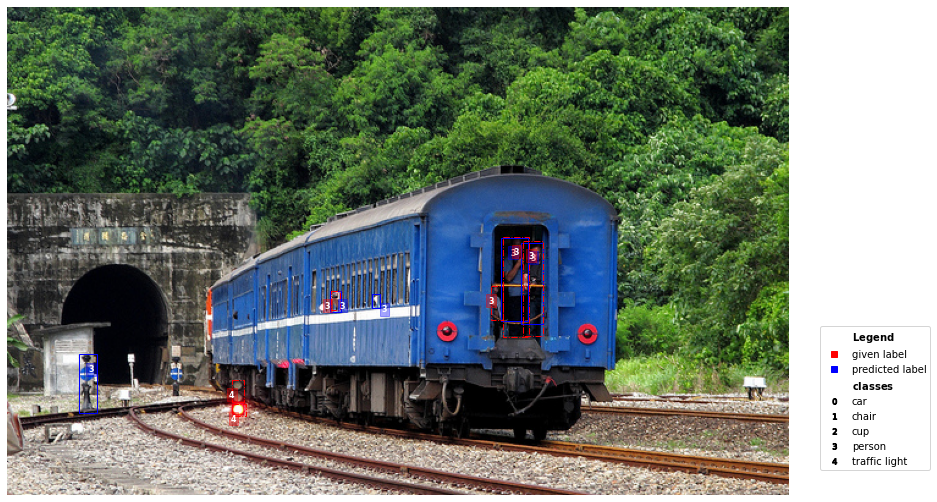

In [42]:
# control figure size for the visualization
class_labels = {0: "car", 1: "chair", 2: "cup", 3:"person", 4: "traffic light"}
visualize(image_path, annotations[example_image_idx], predictions[example_image_idx], figsize=(14,10), prediction_threshold=0.5, class_labels=class_labels)